In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [6]:
df.isnull().sum()  # if any null we replace them with mean or median for numeric values for object we replace with mode

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
#median middle value in ascending or dscending order
#when to use mean or median for replacing by mean the distribution should be  follow normal distribution
#for median no rule you can use it anytime
#if any null for replacing code
'''
[for numerical column]
df['age'].fillna(df['age'],median,inplace=True) inplace means from there we changed entire dataset True
if mean replace median with mean

for categorical columns
df['smoker'].fillna(df['smoker'].mode,inplace=True)
'''

"\n[for numerical column]\ndf['age'].fillna(df['age'],median,inplace=True) inplace means from there we changed entire dataset True\nif mean replace median with mean\n\nfor categorical columns\ndf['smoker'].fillna(df['smoker'].mode,inplace=True)\n"

In [8]:
#checking the descriptive statistics only numeric comes if you want category too convert them to numeric
df.describe() #min 18 in column of age in csv 25% is 1st quartile q1 50 q2 75 q3 box plot

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [10]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

In [11]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [12]:
df.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [13]:
df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [14]:
df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [15]:
df.children.unique()

array([0, 1, 3, 2, 5, 4])

In [16]:
df.children.value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [17]:
#df.corr() error categorical column

#Visualization

###univariate analysis

<ipython-input-18-728a337fddd8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age)


<Axes: xlabel='age', ylabel='Density'>

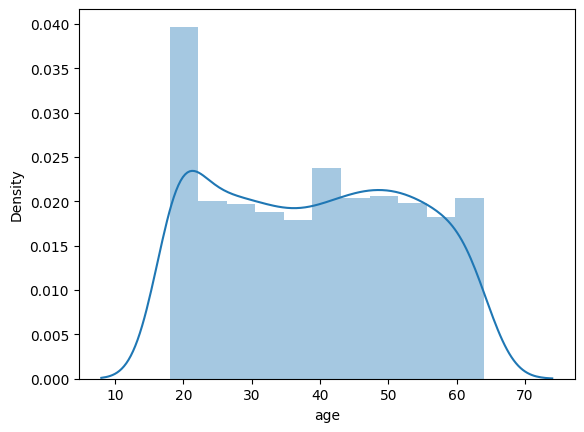

In [18]:
#univariate  analysis
sns.distplot(df.age)


In [19]:
#for any graph if we get correct bell shape curve then normal distribution then mean can be used to replace


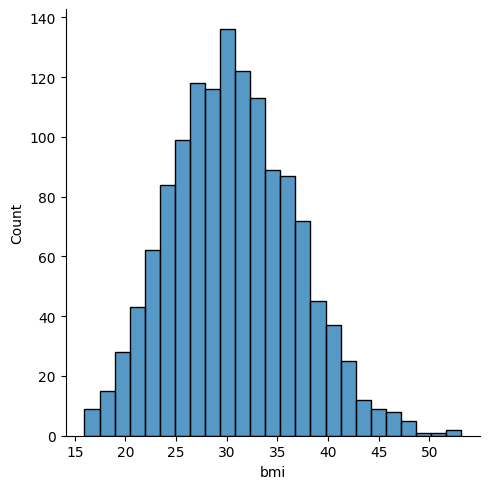

In [20]:
sns.displot(df.bmi)

([<matplotlib.patches.Wedge at 0x7ed7147efe50>,
 [Text(-0.8801026332278259, 0.6598631335250117, ''),
  Text(0.8865033796513009, -0.6646621381324664, '')])

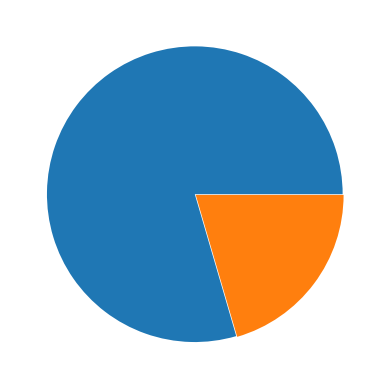

In [21]:
#for categorical columns
plt.pie(df.smoker.value_counts(),[0,.008]) #[0,.008 ] like explode

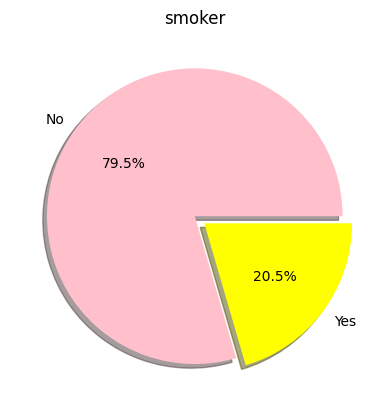

In [22]:
plt.pie(df.smoker.value_counts(),[0,.08],labels=['No','Yes'],autopct='%1.1f%%',shadow=True,colors=['pink','yellow'])
plt.title('smoker')
plt.show()

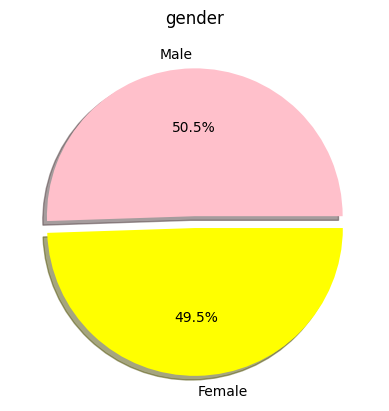

In [23]:
plt.pie(df.sex.value_counts(),[0,.08],labels=['Male','Female'],autopct='%1.1f%%',shadow=True,colors=['pink','yellow'])
plt.title('gender')
plt.show()

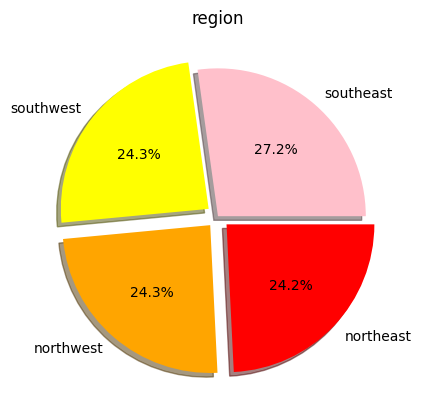

In [24]:
plt.pie(df.region.value_counts(),[0,.08,.08,0.08],labels=['southeast','southwest','northwest','northeast'],autopct='%1.1f%%',shadow=True,colors=['pink','yellow','orange','red'])
plt.title('region')#in order as table northwest south etc etc explode also
plt.show()

<Axes: xlabel='region', ylabel='count'>

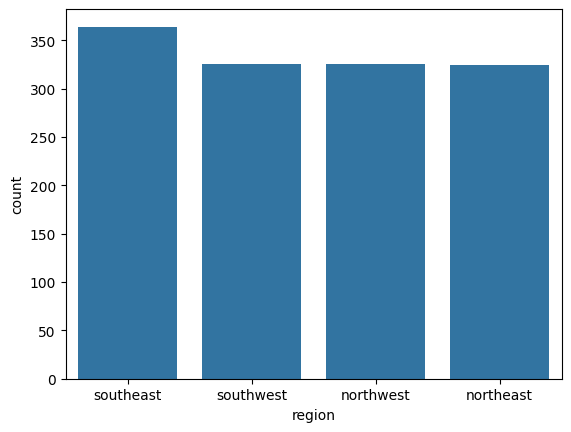

In [25]:
#for category barplot
sns.barplot(x=df.region.value_counts().index,y=df.region.value_counts())

#Bi variate analysis

<Axes: xlabel='age', ylabel='bmi'>

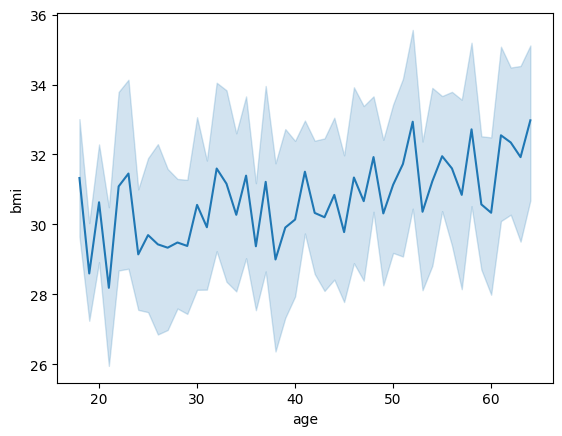

In [26]:
sns.lineplot(x=df.age,y=df.bmi)

<Axes: xlabel='age', ylabel='charges'>

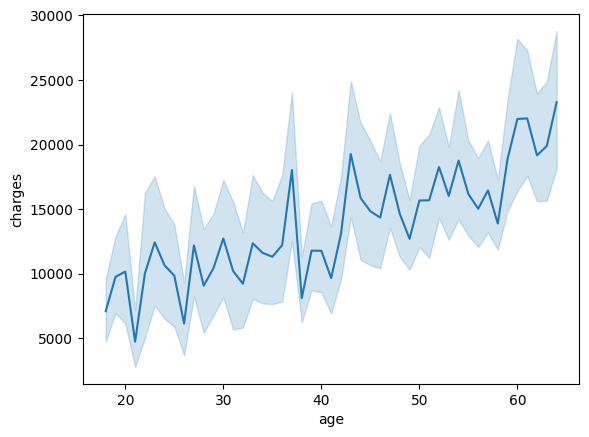

In [27]:
sns.lineplot(x=df.age,y=df.charges)

<Axes: xlabel='age', ylabel='bmi'>

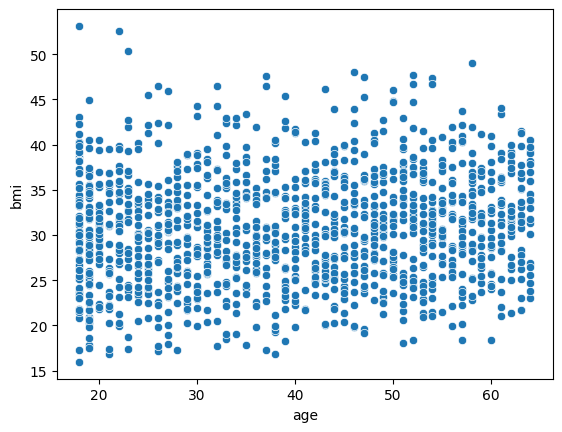

In [28]:
sns.scatterplot(x=df.age,y=df.bmi)

#multi variate

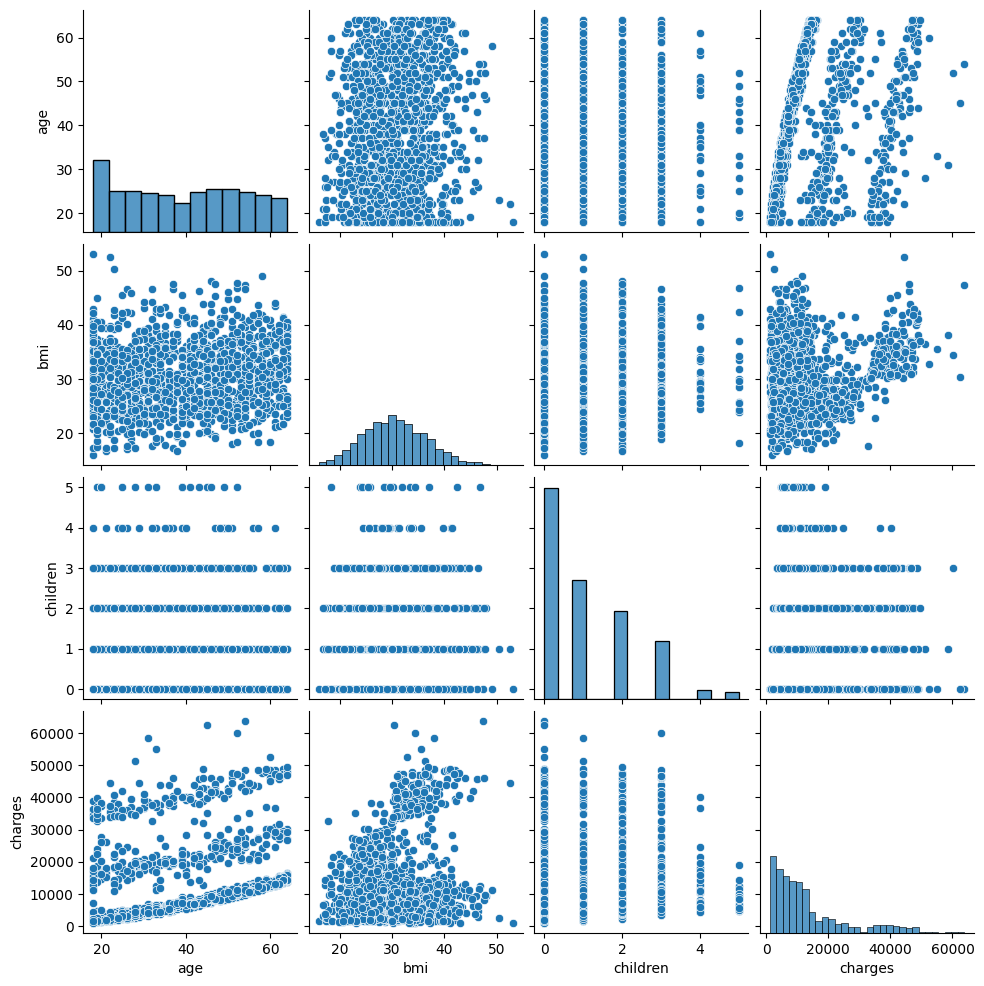

In [29]:
sns.pairplot(df)

#Outlier detection

In [30]:
#either remove them or replace them with median
# we are replacing cause we dont have enough data cause reomving effects our prediction

In [31]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: ylabel='bmi'>

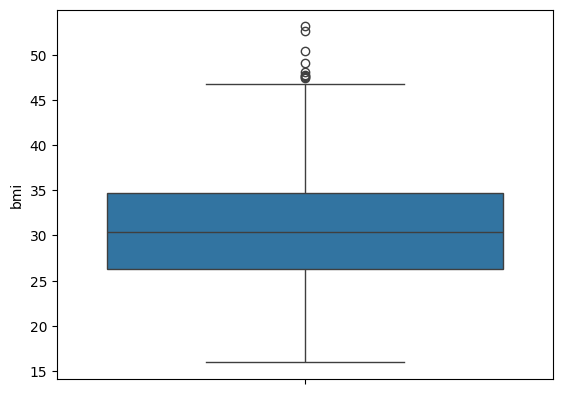

In [32]:
sns.boxplot(df.bmi)

In [33]:
#if real world data means we remove outlier by percentile method iqr method

#outlier treatment-replacement with median

In [34]:
#upper limit=q3+1.5*IQR(formula)if outlier are beyond upperlimit find upperlimit
#lower limit=q1-1=5*IQR

In [35]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [36]:
q1=df.bmi.quantile(0.25)
q1

26.29625

In [37]:
q3=df.bmi.quantile(0.75)
q3

34.69375

In [38]:
IQR=q3-q1#inter quartilr range
IQR

8.3975

In [39]:
Upperlimit=q3+1.5*IQR
Upperlimit

47.290000000000006

In [40]:
Lowerlimit=q1-1.5*IQR
Lowerlimit

13.7

In [41]:
#median 30.40
df.bmi.median()

30.4

In [42]:
df['bmi']=np.where(df['bmi']>Upperlimit,30,df['bmi'])

<Axes: ylabel='bmi'>

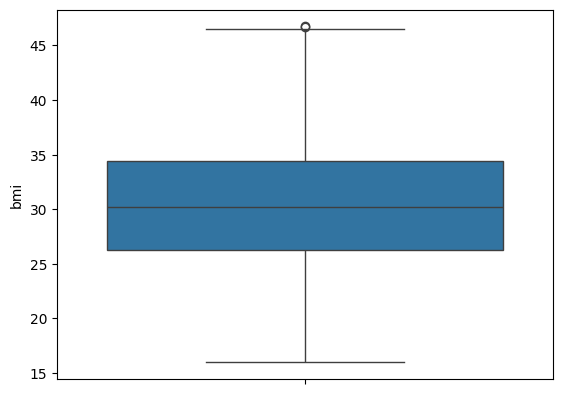

In [43]:
sns.boxplot(df.bmi)# one dot is very close to 30 so still there one out;ayer

In [44]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#Encoding techniques

In [45]:
#label encoding and one hot encoding
#label encoding alphabetic order encoder female male female 0 male 1 smoker no 0 yes 1
#one hot create duplicate columns for yes one column for no other

In [46]:
#one hot means if smoker column consider yes no yes no yes yes
#smoker_yes smoker_no
 # 1           0
 #0            1
 # 1            0
 # 0            1
 # 1            0
 # 1            0 if for region then 4 region columns more categories means use one hot but size increases no of feature increase
 # no of features increase accuracy deacresae dimensionality reduction reducing no of features

label encoding

In [47]:
from sklearn.preprocessing import LabelEncoder #scikit learn
le=LabelEncoder()#initialization

In [48]:
df.sex=le.fit_transform(df.sex)
df.smoker=le.fit_transform(df.smoker)

In [49]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


one hot encoding

In [50]:
df1=pd.get_dummies(df,columns=['region']) #previous means 0,1 now T F update for get dummies
#one hot no of columns increse size
df1.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


In [51]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [52]:
df.region=le.fit_transform(df.region)

In [53]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [54]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.114259,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.039625,0.017163,0.076185,0.004588,0.057292
bmi,0.114259,0.039625,1.000000,0.017435,-0.003052,0.155342,0.190312
children,0.042469,0.017163,0.017435,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,-0.003052,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.155342,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.190312,0.067998,0.787251,-0.006208,1.000000


<Axes: >

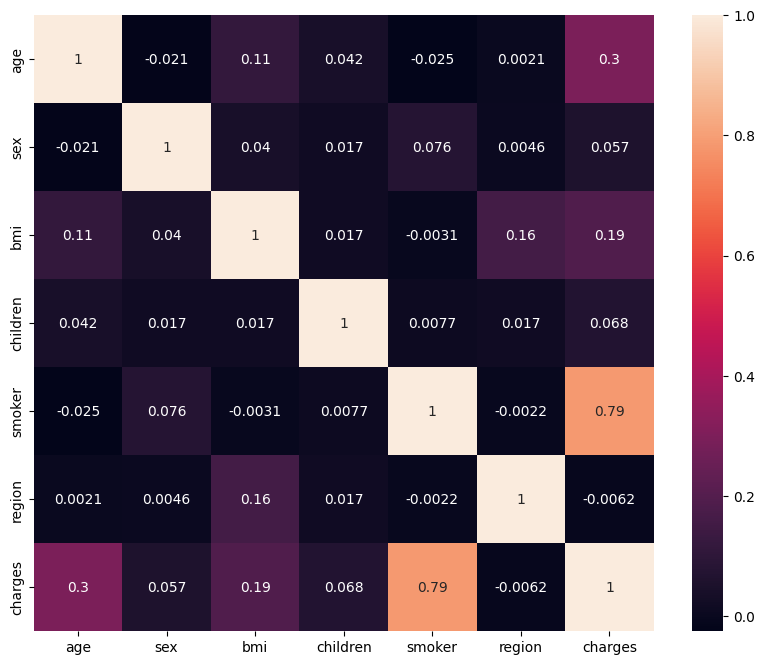

In [55]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [56]:
#charges is predicting column
df.corr().charges.sort_values(ascending=False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.190312
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64

In [57]:
#the high corr btw 2 parametres not target column-charges them drop one column (above.95 or so)--multicolinearilty

In [58]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


X and y split,x indpt y dpt (x should be capital)

In [59]:
#independent features are used to calculate predict dependent variable (charges)

In [62]:
X=df.drop(columns=['charges'],axis=1)
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [61]:
y=df.charges
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [64]:
X.head() #age 2 magnitude (2 digits) sex 1 bmi 2digit with floating smoker 1 if there is another column like salary
#with 5 digits then the distance based machine learning algorithm only considers the high magnitude column
#dist based alg linear regression logistic reression knn eculidean dist formula to avoid that
#but these other features are alos required for our prediction so we scale the data and change the magnitude from -1 to 1 or 0 to 1

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [65]:
#we are only changing magnitude not the values
#minmax scaling 0 to 1 mag
#standard scaling -1 to 1

#Scaling

#Minmax Scaling

In [66]:
#after split only scaling you should not scale the target calumn charge

In [67]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [68]:
X_scaled=pd.DataFrame(scale.fit_transform(x),columns=X.columns)
X_scaled.head()

,age,sex,bmi,children,smoker,region
0,0.021739,0.0,0.387788,0.0,1.0,1.000000
1,0.000000,1.0,0.578435,0.2,0.0,0.666667
2,0.217391,1.0,0.553426,0.6,0.0,0.666667
3,0.326087,1.0,0.219065,0.0,0.0,0.333333
4,0.304348,1.0,0.419617,0.0,0.0,0.333333


##train test split

In [76]:
df.shape#1338 obs 1338 C 70

(1338, 7)

In [72]:
#machine learning training our machine we give data to machine for train and test
#train and test split (data is splited for train  some and test some)
#ideal size for train test split is 70 30 70 for train 30 test its ideal size you can use 80 20 or anything
#sometimes validation is there instead of test
#validation data training data testing data
#why validation :parameter tuning if accuracy is low we have to tune our model (hyper parameter tuning)

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=0)
#random means randomly takes values
#random state shuffing our data to avoid bias (error)
#classification alg
#effected column 10 obs
# 1 effected 0 not effetec
# 1 1 1 1 1 1 1 0 0 0 target column if 70 30 all one goto train 000 to test goes if test prediction gets 1 not 0 so shuffle data
#so for shuffling we consider combinations(nCr)=n fact/r fact* n-r fact n means entire data
#10C7==10C3  70 30
#ans 120 shuffle values 120 120 times possible combinations 0 to 119 states random state =0 means 0th state

In [77]:
X_train.shape

(936, 6)

In [78]:
X_test.shape

(402, 6)

In [81]:
X_train.head() #see index if we change random state again index changes

,age,sex,bmi,children,smoker,region
1163,0.000000,0.0,0.398019,0.0,0.0,0.000000
196,0.456522,0.0,0.546931,0.0,0.0,1.000000
438,0.739130,0.0,1.000000,1.0,0.0,0.666667
183,0.565217,0.0,0.339396,0.0,0.0,0.333333
1298,0.326087,1.0,0.373335,0.4,0.0,0.333333
